In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [6]:
LOGS_DIR = '../../evaluation_logs'
networks_dirs = []
for directory in os.listdir(LOGS_DIR):
    if os.path.isdir(f'{LOGS_DIR}/{directory}'):
        any_sub = False
        for sub_directory in os.listdir(f'{LOGS_DIR}/{directory}'):
            if os.path.isdir(f'{LOGS_DIR}/{directory}/{sub_directory}'):
                networks_dirs.append(f'{LOGS_DIR}/{directory}/{sub_directory}')
                any_sub = True
        if not any_sub:
            networks_dirs.append(f'{LOGS_DIR}/{directory}')
networks_dirs = sorted(networks_dirs)

In [7]:
def load_df_from_file(filename):
    return pd.read_csv(filename, delimiter=';')

def load_df_from_dir(dir_name):
    result = None
    dataset_columns = {}
    for log_file in os.listdir(dir_name):
        if os.path.isfile(f'{dir_name}/{log_file}'):
            df = load_df_from_file(f'{dir_name}/{log_file}')
            df = df.dropna(how='all', axis=1)
            if df is None or 'class' not in df.columns:
                continue
            for column in df.columns:
                new_name = f'{column}_{log_file}'
                if 'data' in column:
                    if '_loader' in column:
                        dataset_name = column.replace('.data', '').replace('_loader', '')
                        if dataset_name not in dataset_columns:
                            dataset_columns[dataset_name] = []
                        dataset_columns[dataset_name].append(new_name)
                        df = df.rename(columns={column: new_name})
                        
                    elif '_path' in column:
                        df = df.rename(columns={column: new_name})
            
            if result is None:
                result = df
            else:
                result = result.merge(df, on=['class', 'nr', 'id'])
    return result, dataset_columns

summed_all = None

datasets_r = []
networks_r = []
accuracies_r = []
for net in networks_dirs:
    df, l_columns = load_df_from_dir(f'{net}')
    if df is None or 'class' not in df.columns:
        continue
    acc_sums = {}
    for letter in l_columns:
        acc_sums[letter] = df[l_columns[letter]].sum()
    counter = len(df['class'])
    print(f'Network {net}:')
    for letter in l_columns:
        if 'auto' in net:
            print(f'Accuracy {letter} : {(acc_sums[letter]/counter).mean()*100:0.3f}')
            datasets_r.append(letter)
            networks_r.append(net.replace(LOGS_DIR, ''))
            accuracies_r.append((acc_sums[letter]/counter).mean()*100)
            
        else:
            print(f'Accuracy {letter} : {(acc_sums[letter]/counter).mean()*100:0.3f}')
            datasets_r.append(letter)
            networks_r.append(net.replace(LOGS_DIR, ''))
            accuracies_r.append((acc_sums[letter]/counter).mean()*100)
d = [datasets_r, networks_r, accuracies_r]

Network ../../evaluation_logs/resnet26/0.0:
Accuracy mixed_next : 13.227
Accuracy mixed_rand : 16.013
Accuracy only_fg : 14.656
Accuracy original : 30.703
Accuracy no_fg : 28.141
Accuracy only_bg_t : 27.467
Network ../../evaluation_logs/resnet26/0.25:
Accuracy mixed_next : 12.973
Accuracy mixed_rand : 15.946
Accuracy only_fg : 15.597
Accuracy original : 29.336
Accuracy no_fg : 26.974
Accuracy only_bg_t : 26.128
Network ../../evaluation_logs/resnet26/0.5:
Accuracy mixed_next : 13.389
Accuracy mixed_rand : 15.851
Accuracy only_fg : 15.617
Accuracy original : 25.889
Accuracy no_fg : 23.953
Accuracy only_bg_t : 23.097
Network ../../evaluation_logs/resnet26/1.0:
Accuracy mixed_next : 12.696
Accuracy mixed_rand : 14.144
Accuracy only_fg : 13.872
Accuracy original : 15.989
Accuracy no_fg : 13.891
Accuracy only_bg_t : 13.838
Network ../../evaluation_logs/resnet34/0.0:
Accuracy mixed_next : 13.963
Accuracy mixed_rand : 15.946
Accuracy only_fg : 13.442
Accuracy original : 33.231
Accuracy no_fg :

In [8]:
d = list(zip(*d[::-1]))
d = list(zip(*d[::-1]))
d = list(zip(*d[::-1]))

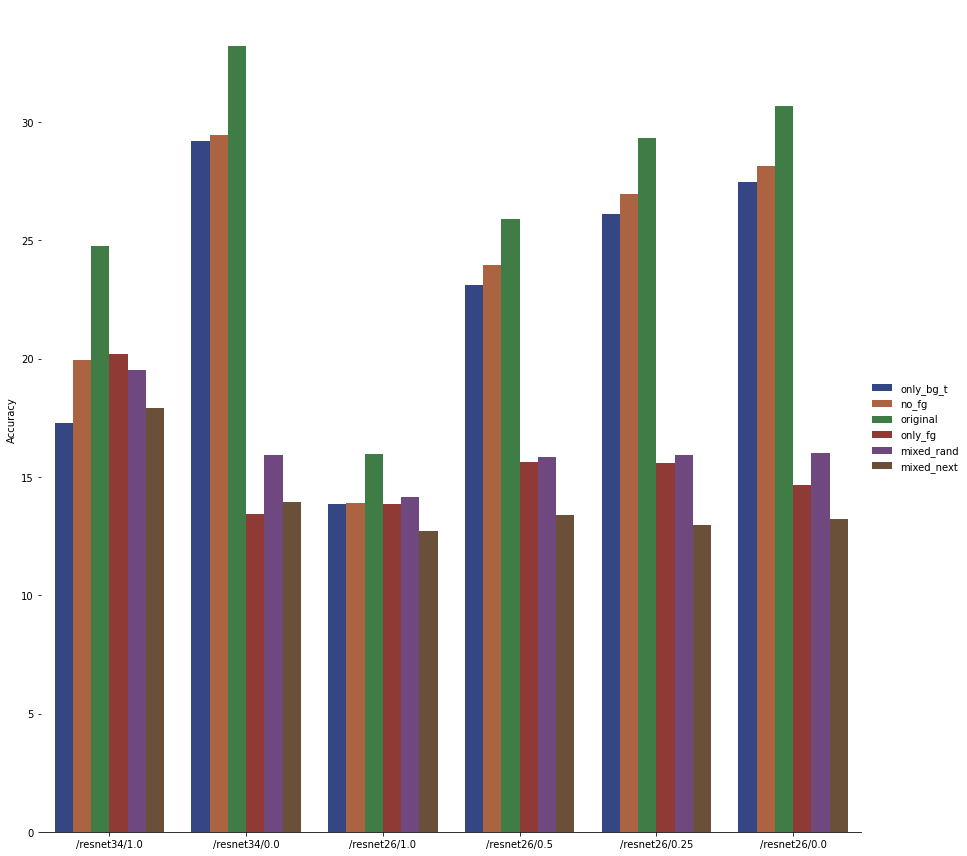

In [9]:
res_df = pd.DataFrame(data=d, columns=['dataset', 'network', 'accuracy'])
g = sns.catplot(
    data=res_df, kind="bar",
    x="network", y="accuracy", hue="dataset",
    ci="sd", palette="dark", alpha=.85, height=12
)
g.despine(left=True)
g.set_axis_labels("", "Accuracy")
g.legend.set_title("")